# Assignment -Linear Regression

## Submited By- Sudhanshu Shukla

In [1]:
#imoprting libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
import statsmodels.api as sm  
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#supress Warnings
warnings.filterwarnings('ignore')

In [3]:
#Set max to se full text
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 300)
pd.options.display.max_columns = None

### Importing and Cleaning data

In [4]:
#reading csv
car=pd.read_csv("CarPrice.csv")

In [5]:
#viewing the head 
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#viewing the tail
car.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
# Distribution of data
car.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#check the data type
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [9]:
#Checking if car_ID column is the unique and can act as a primary key
print("Id Count-",car["car_ID"].count())
print("Unique Count-",len(car["car_ID"].unique()))

Id Count- 205
Unique Count- 205


### Cleaning data and Data Preparation

In [10]:
#Chek if data has any null value
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(car.isnull().sum()/len(car.index)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [12]:
#check if any row has all the values as null
car.isnull().all(axis=1).sum()

0

### Finding discrepancies in data

In [13]:
#Categorical Columns
numerical_col = car.dtypes[car.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_col))
print(numerical_col)

# of Numerical features:  16
Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [14]:
#Converting to lower case
car['CarName']=car['CarName'].apply(lambda x:x.lower())

In [15]:
#checking carname dataframe
print(car['CarName'].sort_values(ascending=True).unique())

['alfa-romero giulia' 'alfa-romero quadrifoglio' 'alfa-romero stelvio'
 'audi 100 ls' 'audi 100ls' 'audi 4000' 'audi 5000' 'audi 5000s (diesel)'
 'audi fox' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw x4' 'bmw x5' 'bmw z4'
 'buick century' 'buick century luxus (sw)' 'buick century special'
 'buick electra 225 custom' 'buick opel isuzu deluxe'
 'buick regal sport coupe (turbo)' 'buick skyhawk' 'buick skylark'
 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge challenger se' 'dodge colt (sw)' 'dodge colt hardtop'
 'dodge coronet custom' 'dodge coronet custom (sw)' 'dodge d200'
 'dodge dart custom' 'dodge monaco (sw)' 'dodge rampage' 'honda accord'
 'honda accord cvcc' 'honda accord lx' 'honda civic' 'honda civic (auto)'
 'honda civic 1300' 'honda civic 1500 gl' 'honda civic cvcc'
 'honda prelude' 'isuzu d-max ' 'isuzu d-max v-cross' 'isuzu mu-x'
 'jaguar xf' 'jaguar xj' 'jaguar xk' 'maxda glc deluxe' 'maxda rx3'
 'mazda 626' 'mazda glc' 'mazda glc 4' 'mazda glc custom'
 'maz

In [16]:
#checking the frequency of car name
car['CarName'].value_counts()

peugeot 504                        6
toyota corona                      6
toyota corolla                     6
subaru dl                          4
mitsubishi g4                      3
mitsubishi outlander               3
mazda 626                          3
honda civic                        3
toyota mark ii                     3
mitsubishi mirage g4               3
nissan rogue                       2
volvo 244dl                        2
mazda rx-4                         2
volvo 264gl                        2
toyota corolla 1200                2
volkswagen dasher                  2
peugeot 604sl                      2
saab 99e                           2
subaru                             2
honda civic cvcc                   2
porsche cayenne                    2
nissan clipper                     2
toyota corolla liftback            2
nissan latio                       2
isuzu d-max                        2
volvo 145e (sw)                    2
saab 99le                          2
s

### Fixing Data Issues

In [17]:
#cheking if there are spelling mistakes
from difflib import SequenceMatcher

In [18]:
#function to check the spelling mistakes
def checkValues(index,threshold):
    shown=[]
    for name in car[index].unique():
        for cname in car[index].unique():
            if name!=cname and name not in shown:
                ratio=SequenceMatcher(a=cname,b=name).ratio()
                if(ratio>=threshold):
                    print(cname,'|',name,'| ',ratio)
                    shown.append(cname)

In [19]:
#Checking the ratio
checkValues('CarName',0.90)

audi 100ls | audi 100 ls |  0.9523809523809523
mazda glc deluxe | maxda glc deluxe |  0.9375
mazda glc 4 | mazda glc |  0.9
mazda glc custom | mazda glc custom l |  0.9411764705882353
mitsubishi mirage g4 | mitsubishi mirage |  0.918918918918919
peugeot 304 | peugeot 504 |  0.9090909090909091
saab 99le | saab 99e |  0.9411764705882353
saab 99le | saab 99gle |  0.9473684210526315
toyota corona liftback | toyota corolla liftback |  0.9333333333333333
toyouta tercel | toyota tercel |  0.9629629629629629
volkswagen rabbit | vokswagen rabbit |  0.9696969696969697


In [20]:
#function to correct spelling mistakes
def fixNames(name):
    correct=name
    if name=='audi 100 ls':#has extra space in name
        correct='audi 100ls'
    elif 'maxda' in name:#spelling of mazda is wrong
        correct=name.replace('maxda','mazda')
    elif 'toyouta' in name:#spelling of toyota is wrong
        correct=name.replace('toyouta','toyota')
    elif 'vokswagen' in name:#spelling of volkswagen is wrong
        correct=name.replace('vokswagen','volkswagen')       
    elif 'vw' in name:#spelling of volkswagen is wrong
        correct=name.replace('vw','volkswagen')
    elif 'porcshce' in name:#spelling of volkswagen is wrong
        correct=name.replace('porcshce','porsche')    
    return correct

In [21]:
#fixing the carname column
car['CarName']=car['CarName'].apply(lambda x:fixNames(x))

In [22]:
#check the ratio
checkValues('CarName',0.90)

mazda glc 4 | mazda glc |  0.9
mazda glc custom | mazda glc custom l |  0.9411764705882353
mitsubishi mirage g4 | mitsubishi mirage |  0.918918918918919
peugeot 304 | peugeot 504 |  0.9090909090909091
saab 99le | saab 99e |  0.9411764705882353
saab 99le | saab 99gle |  0.9473684210526315
toyota corona liftback | toyota corolla liftback |  0.9333333333333333


In [23]:
#Confirming the changes
print(car['CarName'].sort_values(ascending=True).unique())

['alfa-romero giulia' 'alfa-romero quadrifoglio' 'alfa-romero stelvio'
 'audi 100ls' 'audi 4000' 'audi 5000' 'audi 5000s (diesel)' 'audi fox'
 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw x4' 'bmw x5' 'bmw z4' 'buick century'
 'buick century luxus (sw)' 'buick century special'
 'buick electra 225 custom' 'buick opel isuzu deluxe'
 'buick regal sport coupe (turbo)' 'buick skyhawk' 'buick skylark'
 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge challenger se' 'dodge colt (sw)' 'dodge colt hardtop'
 'dodge coronet custom' 'dodge coronet custom (sw)' 'dodge d200'
 'dodge dart custom' 'dodge monaco (sw)' 'dodge rampage' 'honda accord'
 'honda accord cvcc' 'honda accord lx' 'honda civic' 'honda civic (auto)'
 'honda civic 1300' 'honda civic 1500 gl' 'honda civic cvcc'
 'honda prelude' 'isuzu d-max ' 'isuzu d-max v-cross' 'isuzu mu-x'
 'jaguar xf' 'jaguar xj' 'jaguar xk' 'mazda 626' 'mazda glc' 'mazda glc 4'
 'mazda glc custom' 'mazda glc custom l' 'mazda glc deluxe' 'mazda rx-

In [24]:
#confirming the change
car['CarName'].value_counts()

toyota corona                      6
peugeot 504                        6
toyota corolla                     6
subaru dl                          4
audi 100ls                         3
mitsubishi g4                      3
mitsubishi mirage g4               3
volkswagen rabbit                  3
volkswagen dasher                  3
mitsubishi outlander               3
mazda 626                          3
mazda glc deluxe                   3
honda civic                        3
toyota mark ii                     3
porsche cayenne                    2
saab 99gle                         2
honda civic cvcc                   2
nissan rogue                       2
subaru                             2
volvo 244dl                        2
toyota corolla liftback            2
honda accord                       2
mazda rx-4                         2
nissan latio                       2
volvo 145e (sw)                    2
isuzu d-max                        2
bmw x3                             2
n

### Creating new column for Brand

In [25]:
#retrieving the brand name from car name field as it contains brand+model no
#we don't need model no. hence only taking brand name
car['brand']=car['CarName'].apply(lambda x:x.split(' ')[0])
car['brand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
porsche        5 
isuzu          4 
jaguar         3 
chevrolet      3 
alfa-romero    3 
renault        2 
mercury        1 
Name: brand, dtype: int64

In [26]:
#Checknig the count of brand
len(car['brand'].unique())

22

In [27]:
#checking if any spelling mistake exists
checkValues('brand',0.45)

subaru | isuzu |  0.5454545454545454
subaru | jaguar |  0.5


In [28]:
#Viewing the car dataframe
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [29]:
#function to get Categorical Columns
def get_categorical_col():
    categorical_col = car.dtypes[car.dtypes == "object"].index
    print("# of Categorical features: ", len(categorical_col))
    print(categorical_col)
    return categorical_col

In [30]:
#Categorical Columns
categorical_col=get_categorical_col()

# of Categorical features:  11
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'brand'],
      dtype='object')


## Visualisation

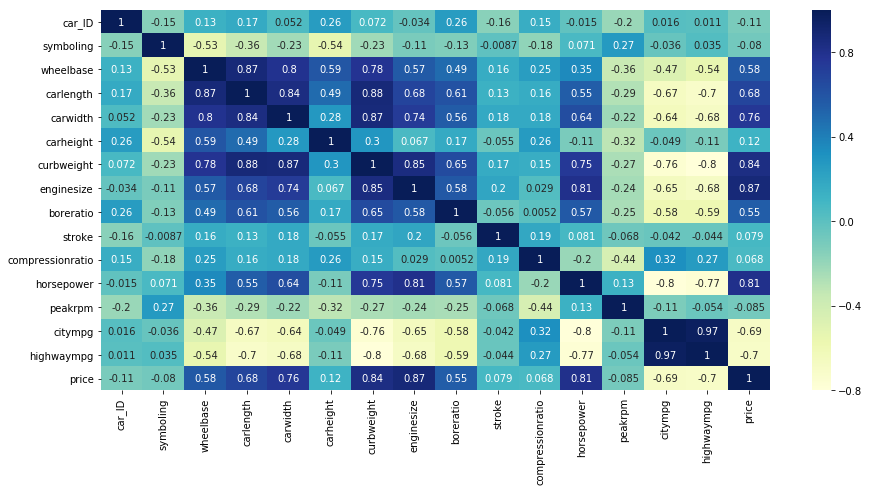

In [31]:
#Finding the correlation
plt.figure(figsize=(15,7))
sns.heatmap(car.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Visualising Numeric Variables

#### Relation of each numerical with each other

<Figure size 1728x864 with 0 Axes>

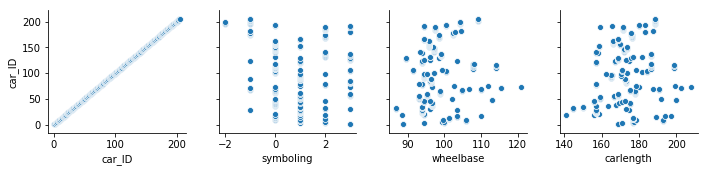

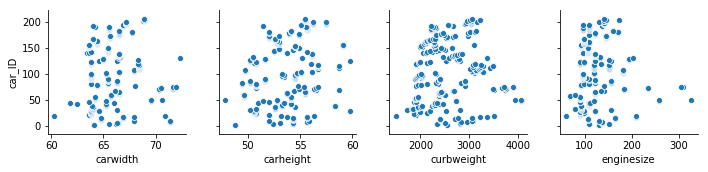

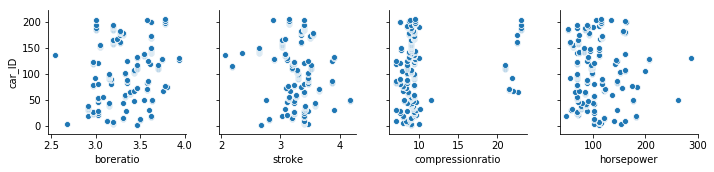

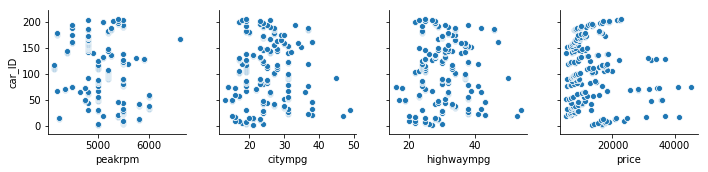

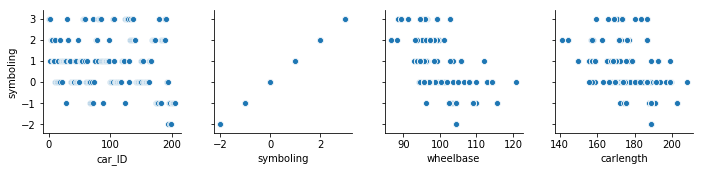

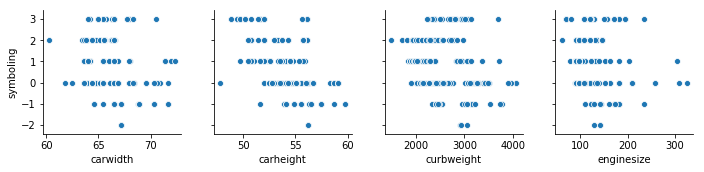

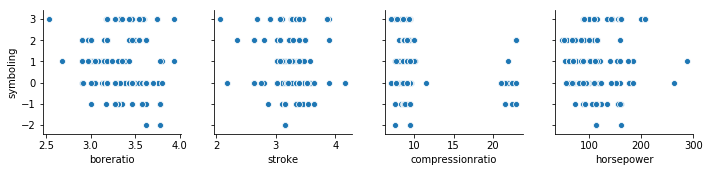

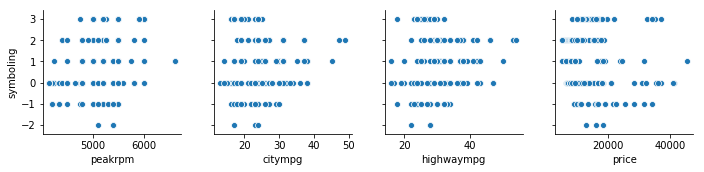

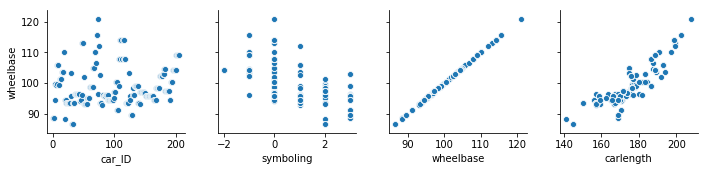

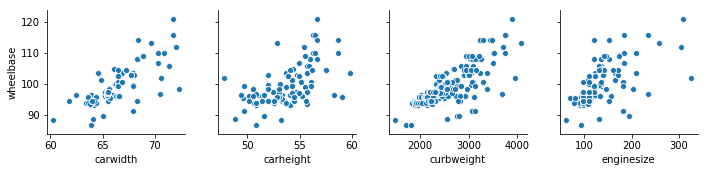

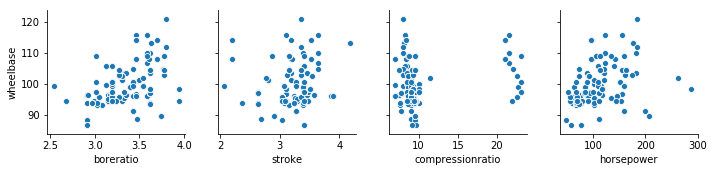

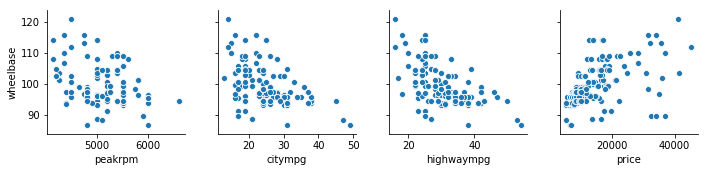

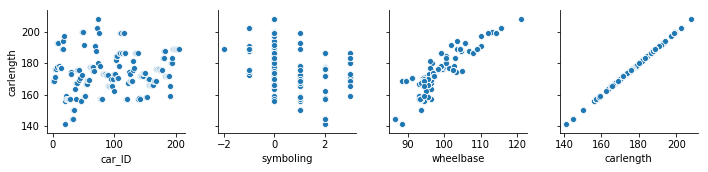

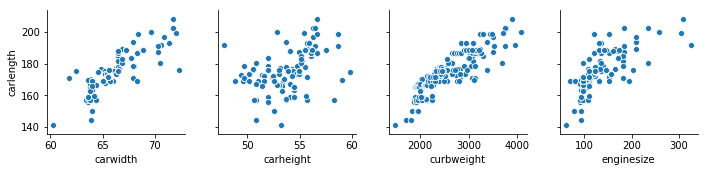

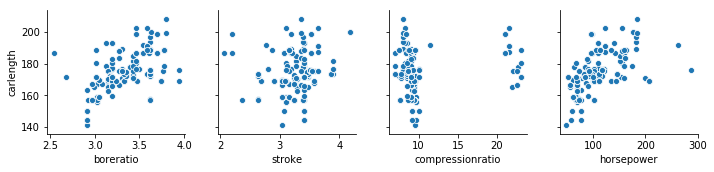

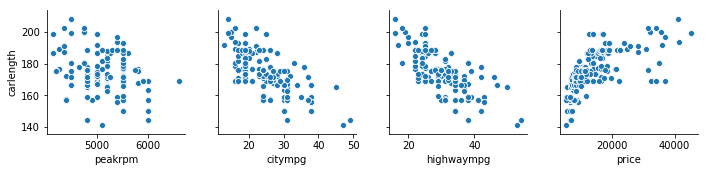

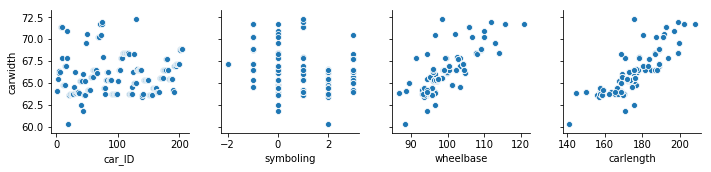

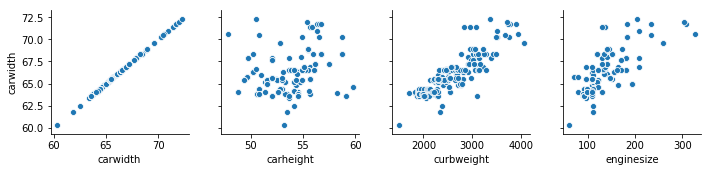

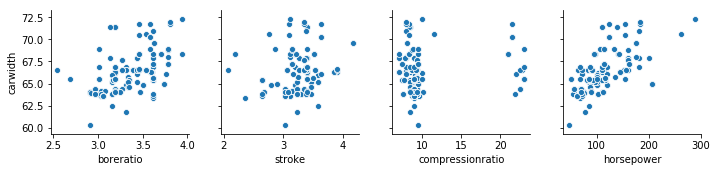

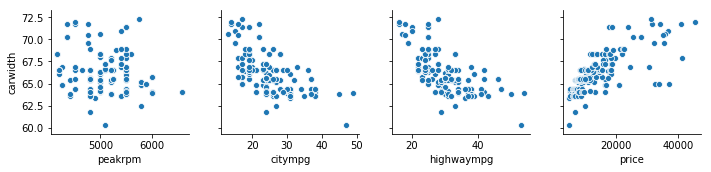

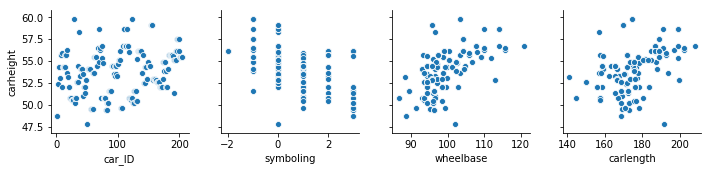

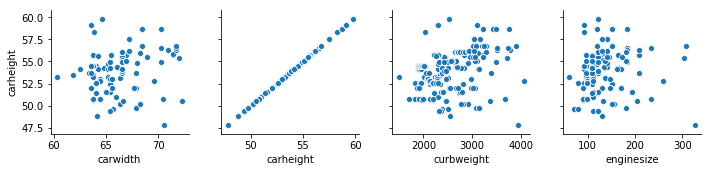

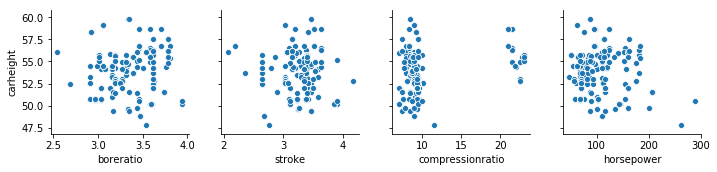

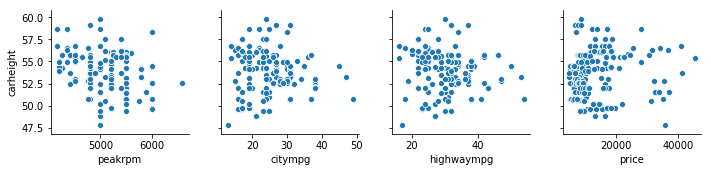

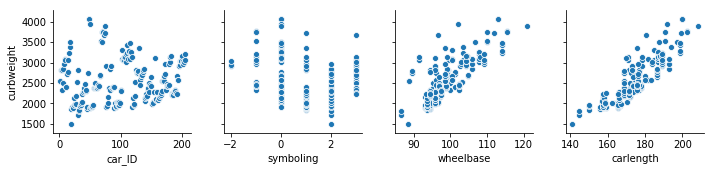

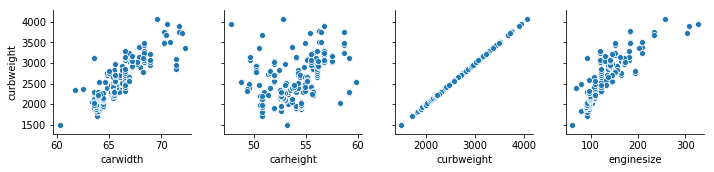

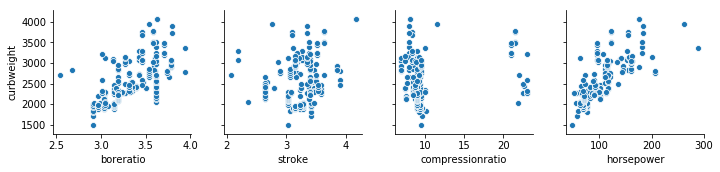

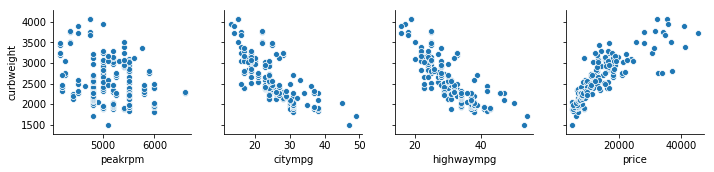

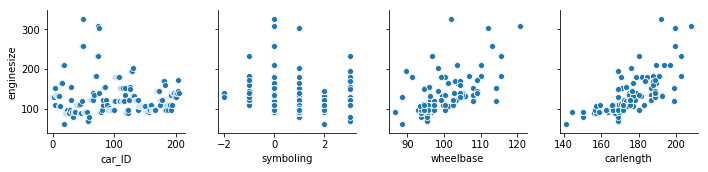

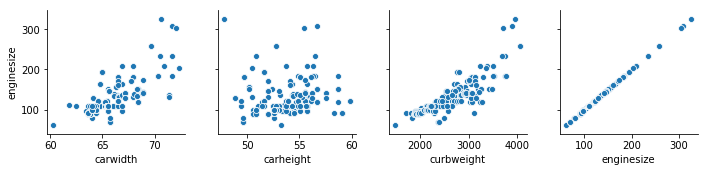

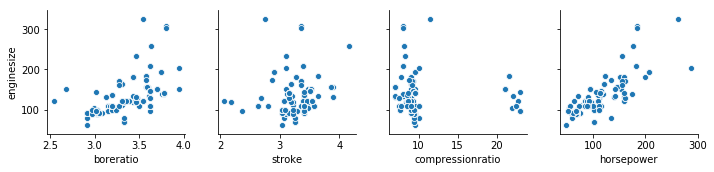

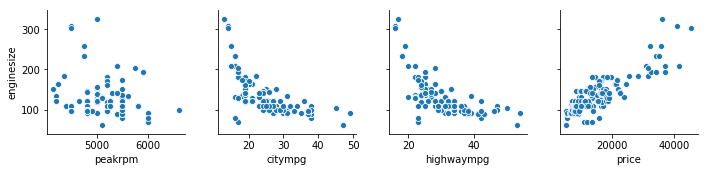

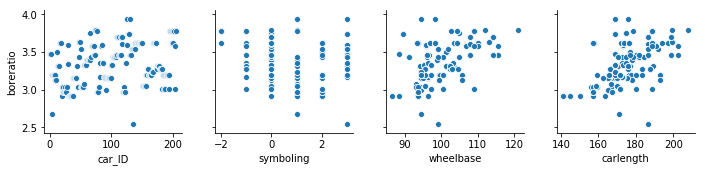

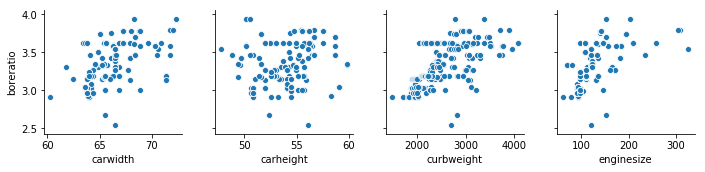

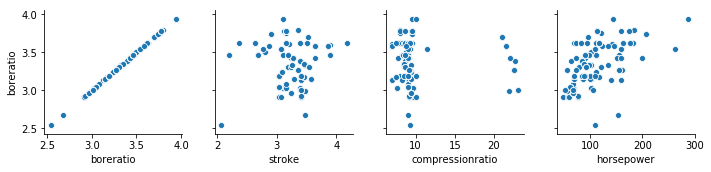

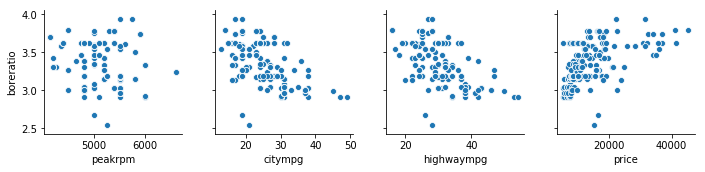

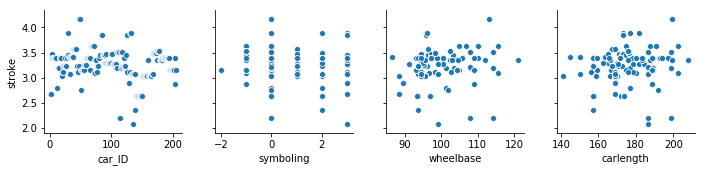

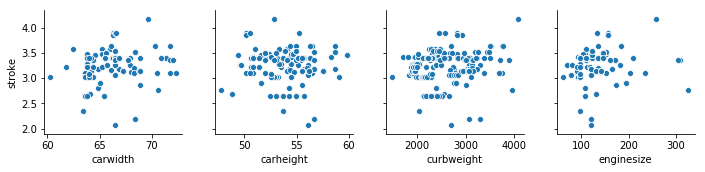

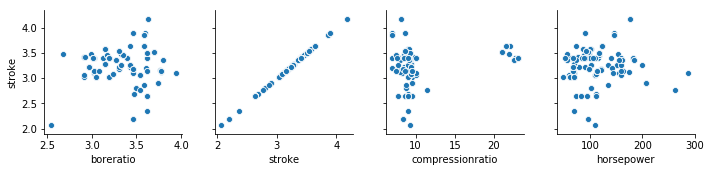

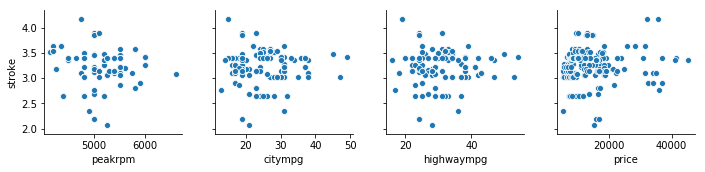

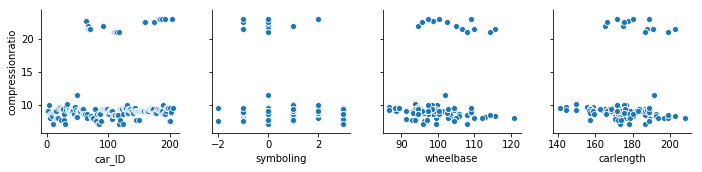

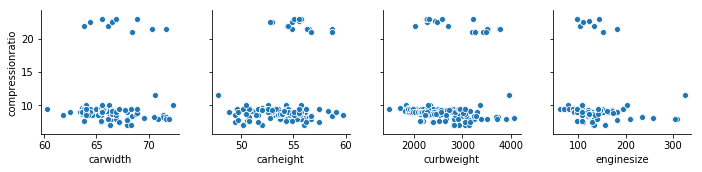

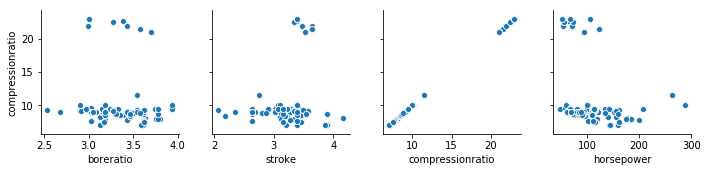

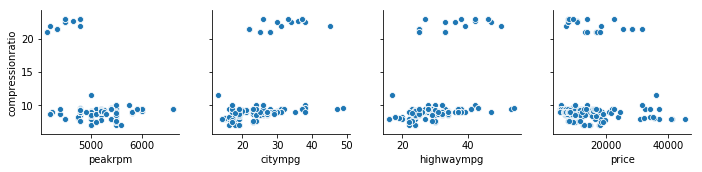

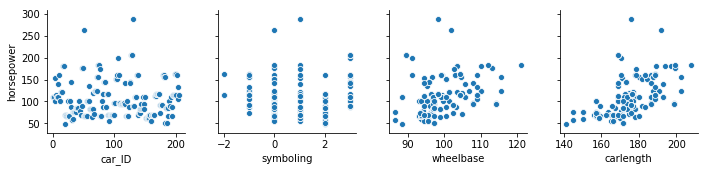

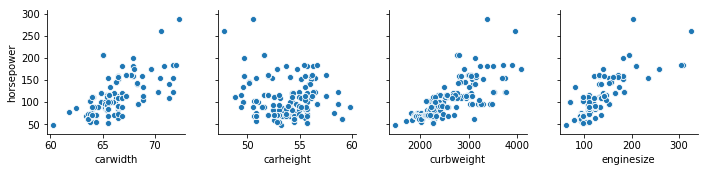

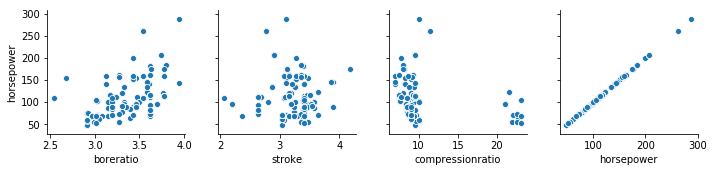

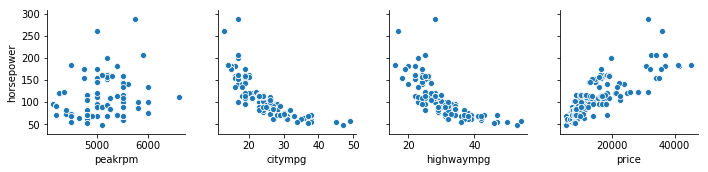

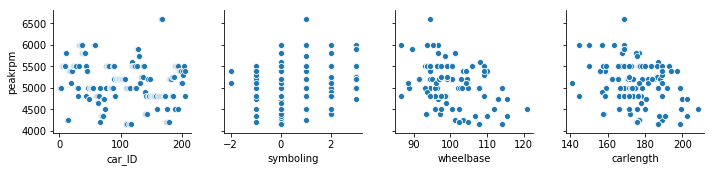

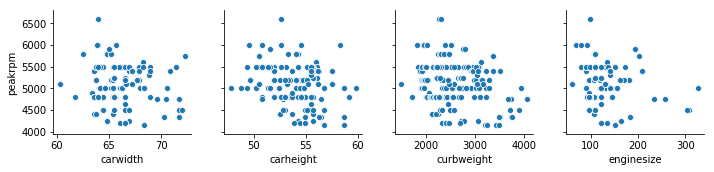

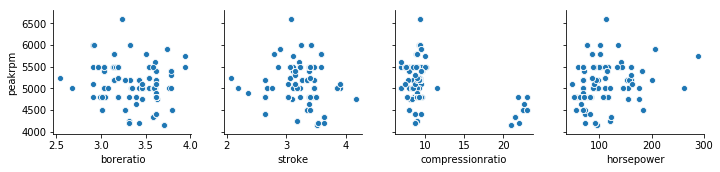

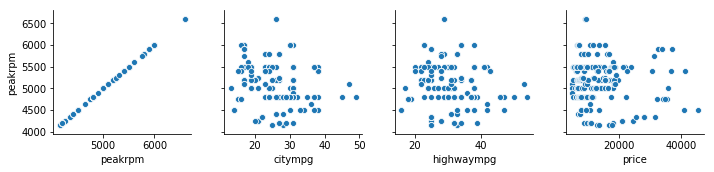

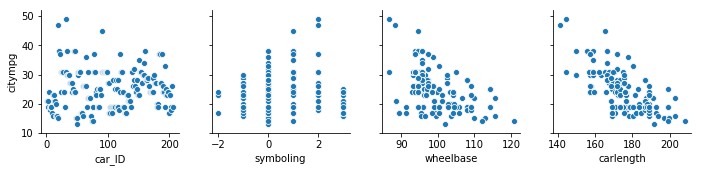

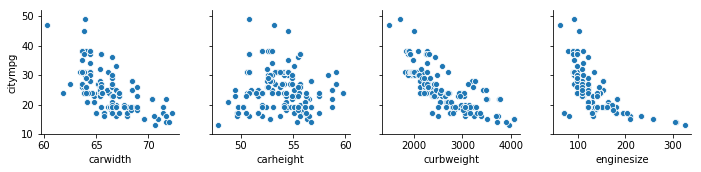

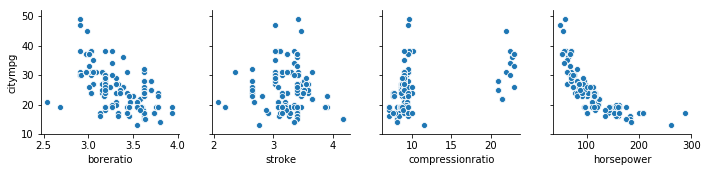

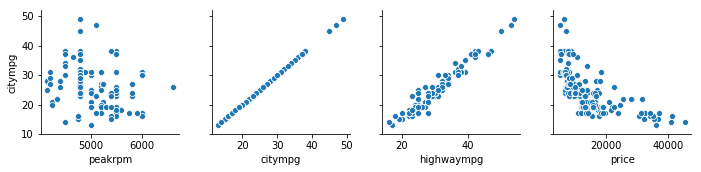

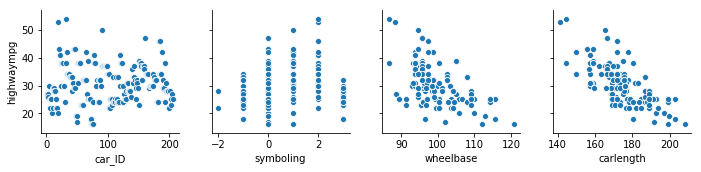

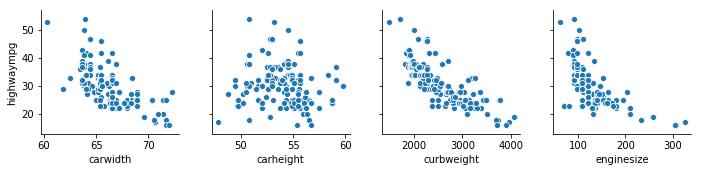

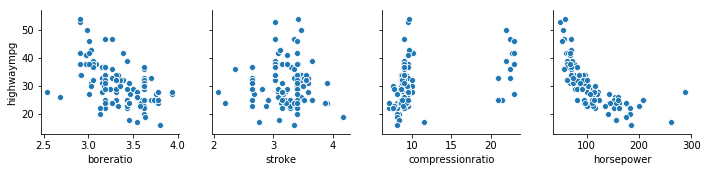

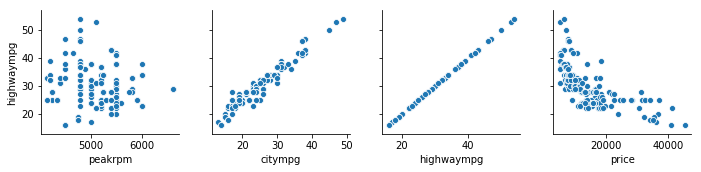

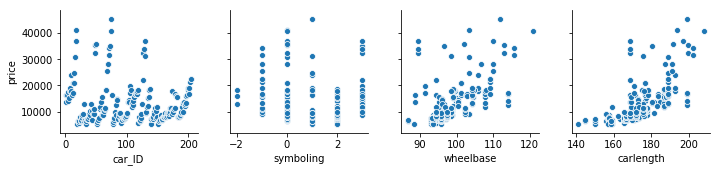

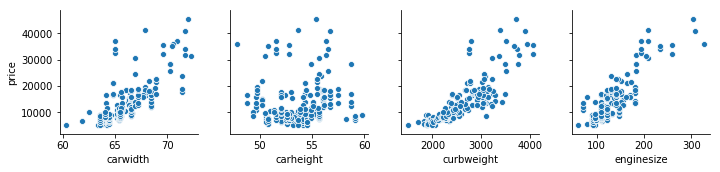

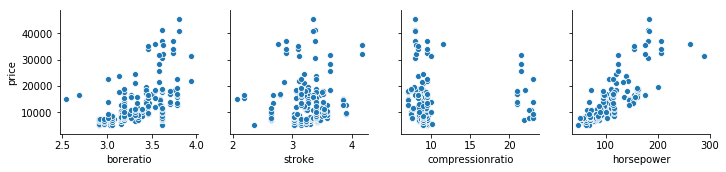

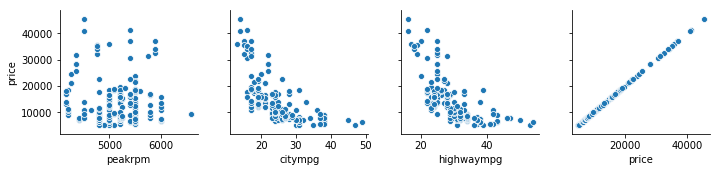

In [32]:
#Pairplot for each numerical value
nr_rows = 4
nr_cols = 4

plt.figure(figsize=(nr_cols*6,nr_rows*3))

for col in numerical_col:
    for index in range(0,len(numerical_col),4):    
        sns.pairplot(car, y_vars=col,x_vars=numerical_col[index:index+4])   
    
plt.show()

<Figure size 1728x864 with 0 Axes>

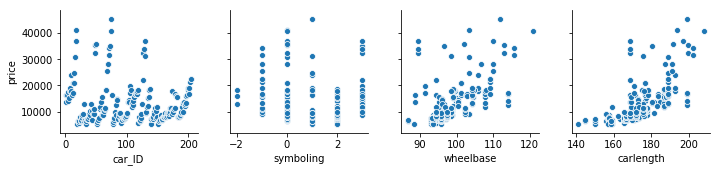

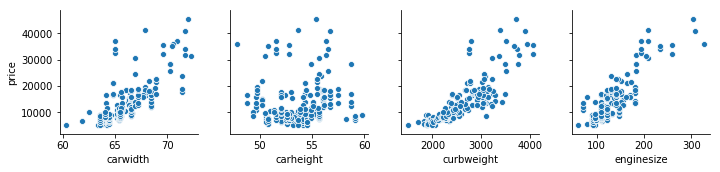

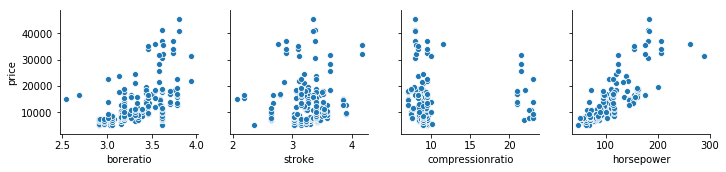

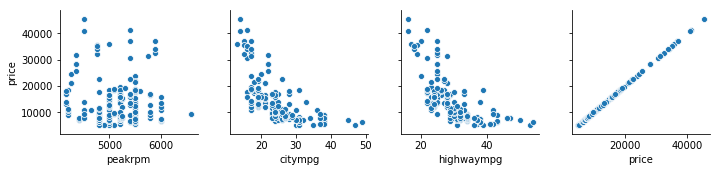

In [33]:
#Pairplot againt price column
nr_rows = 4
nr_cols = 4

plt.figure(figsize=(nr_cols*6,nr_rows*3))

for index in range(0,len(numerical_col),4):    
    sns.pairplot(car, y_vars='price',x_vars=numerical_col[index:index+4])        
plt.show()

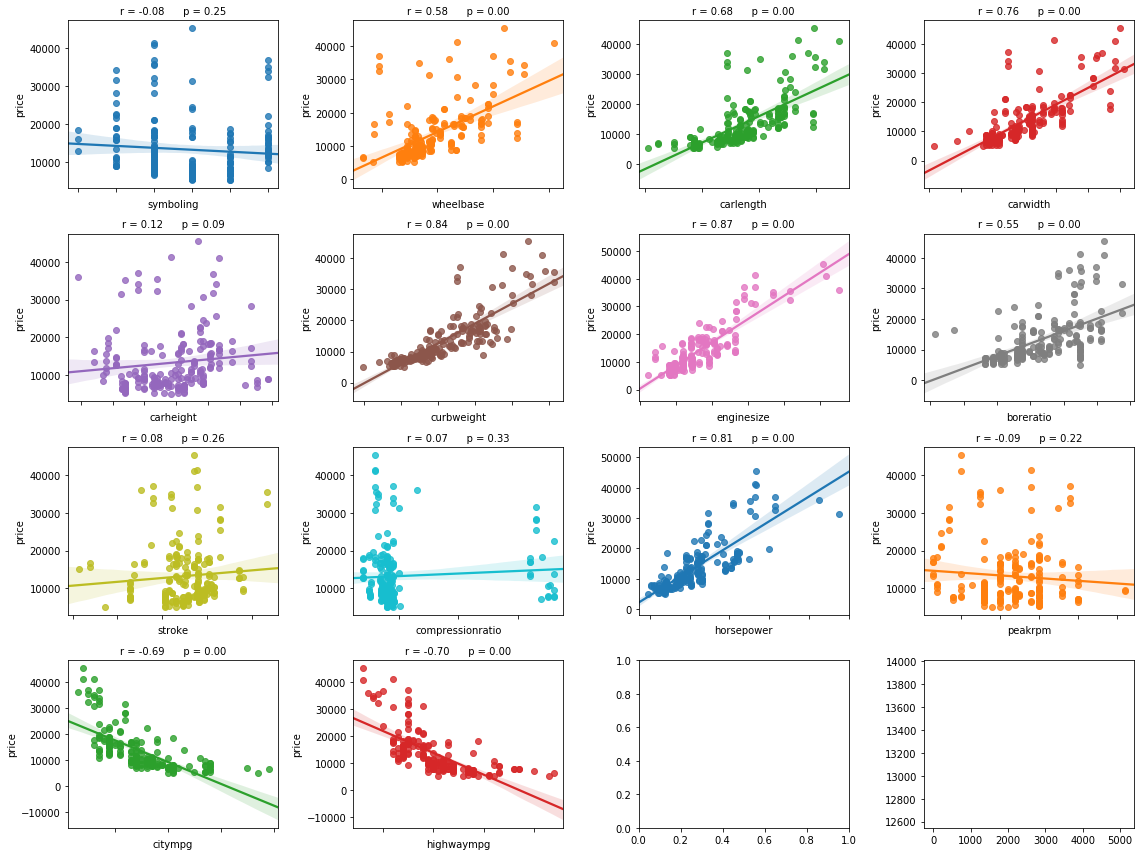

In [34]:
# Pearson Correlation with price
nr_rows = 4
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_col)
li_not_plot = ['price','car_ID']
li_plot_num_feats = [c for c in list(numerical_col) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            p=sns.regplot(car[li_plot_num_feats[i]], car['price'], ax = axs[r][c])
            stp = stats.pearsonr(car[li_plot_num_feats[i]], car['price'])            
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=10)
            p.set_xticklabels(p.get_xticklabels(),rotation=30)
            
plt.tight_layout()    
plt.show()   

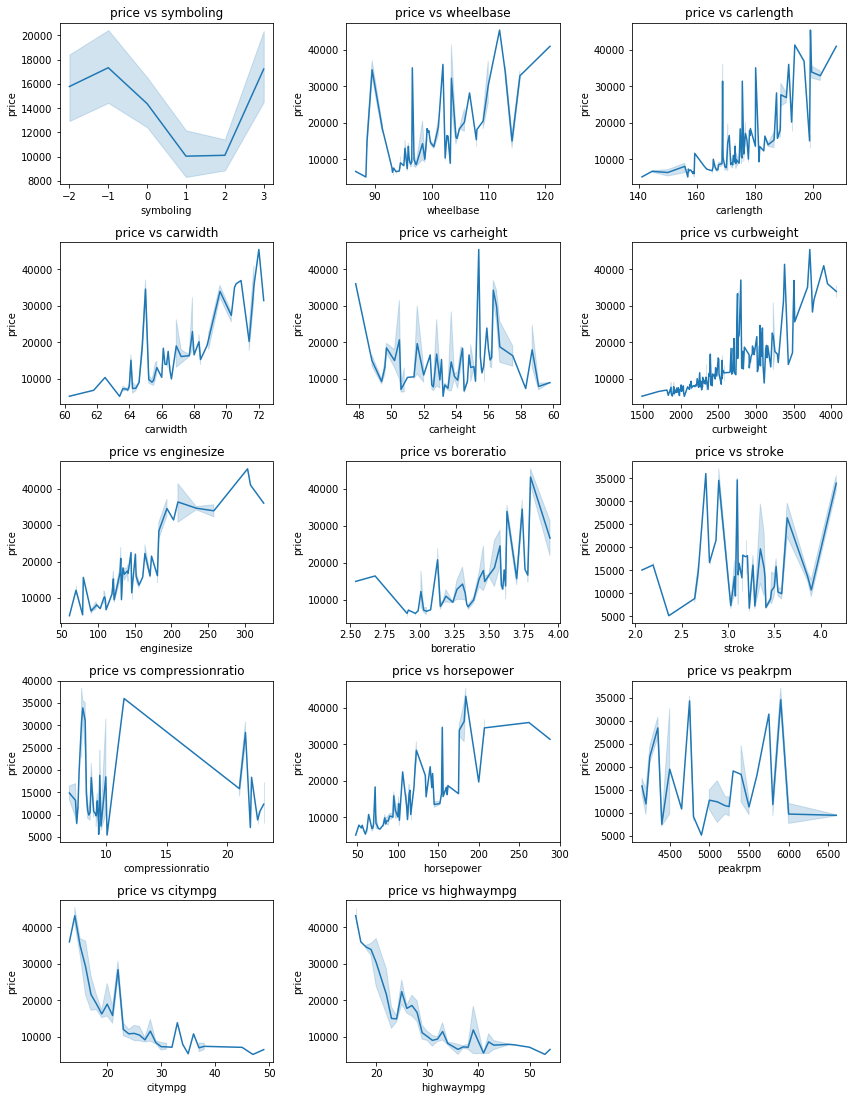

In [35]:
# Line plot for each numerical values against price
nr_rows = 6
nr_cols = 3

plt.figure(figsize=(nr_cols*4,nr_rows*3))

li_num_feats = list(numerical_col)
li_not_plot = ['price','car_ID']
li_plot_num_feats = [c for c in list(li_num_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            plt.subplot(nr_rows, nr_cols, i+1)            
            sns.lineplot(y='price', x=li_plot_num_feats[i], data=car,estimator=np.mean)
            plt.title("price vs " + li_plot_num_feats[i])
            plt.ylabel("price")
            plt.xlabel(li_plot_num_feats[i])            
plt.tight_layout()    
plt.show()


### Based on bussiness knowledge,we can see below columns have high relation with price
####  'wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio', 'horsepower',  'citympg', 'highwaympg',
       

### Categorical columns

In [36]:
# Getting categorical columns
categorical_col=get_categorical_col()

# of Categorical features:  11
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'brand'],
      dtype='object')


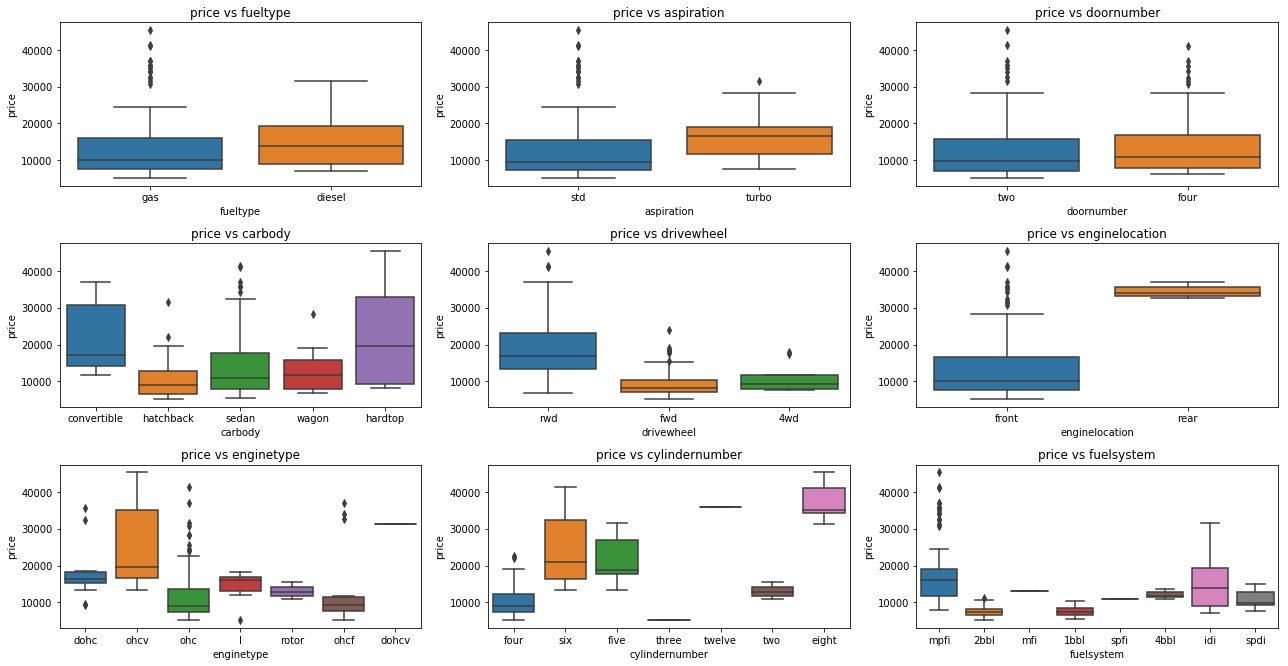

In [37]:
#Spread of each categorical columns
nr_rows = 4
nr_cols = 3

plt.figure(figsize=(nr_cols*6,nr_rows*3))

li_cat_feats = list(categorical_col)
li_not_plot = ['CarName','brand']
li_plot_cat_feats = [c for c in list(li_cat_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_cat_feats):
            plt.subplot(nr_rows, nr_cols, i+1)
            sns.boxplot(y='price', x=li_plot_cat_feats[i], data=car)  
            plt.title("price vs " + li_plot_cat_feats[i])
            plt.ylabel("price")
            plt.xlabel(li_plot_cat_feats[i])                        
plt.tight_layout()    
plt.show()

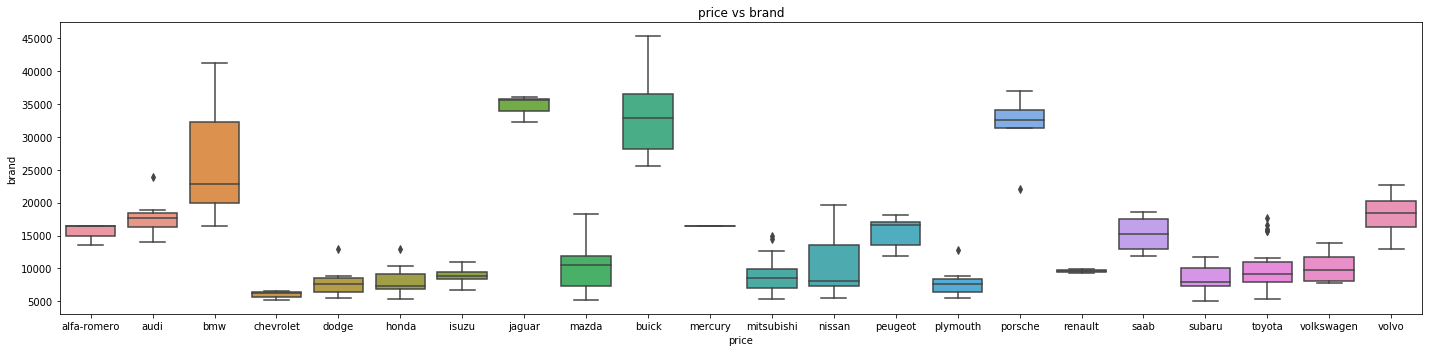

In [38]:
#Spread of Brand
plt.figure(figsize=(20,5))
sns.boxplot(y='price', x='brand', data=car)  
plt.title("price vs brand")
plt.ylabel("brand")
plt.xlabel('price')                        
plt.tight_layout()    
plt.show()

In [39]:
#Function to get frequency of each categorical column
def get_categorical_count():
    for col in categorical_col:
        if col!='CarName':
            display(car[col].value_counts())

In [40]:
#frequency of each categorical column
get_categorical_count()

gas       185
diesel    20 
Name: fueltype, dtype: int64

std      168
turbo    37 
Name: aspiration, dtype: int64

four    115
two     90 
Name: doornumber, dtype: int64

sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
Name: carbody, dtype: int64

fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64

front    202
rear     3  
Name: enginelocation, dtype: int64

ohc      148
ohcf     15 
ohcv     13 
dohc     12 
l        12 
rotor    4  
dohcv    1  
Name: enginetype, dtype: int64

four      159
six       24 
five      11 
eight     5  
two       4  
three     1  
twelve    1  
Name: cylindernumber, dtype: int64

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi    9 
4bbl    3 
spfi    1 
mfi     1 
Name: fuelsystem, dtype: int64

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
porsche        5 
isuzu          4 
jaguar         3 
chevrolet      3 
alfa-romero    3 
renault        2 
mercury        1 
Name: brand, dtype: int64

## Creating dummy variables

#### As many columns have binary values, we can convert them to 0 an 1 enconding

In [41]:
# Defining the map function
def binary_map(x,val):
    return 0 if x==val else 1

In [42]:
#Set gas=1 and diesel=0
car['diesel']=car['fueltype'].apply(lambda x: binary_map(x,'diesel'))

In [43]:
#Viewing the data
car['diesel'].value_counts()

1    185
0    20 
Name: diesel, dtype: int64

In [44]:
##Set turbo=0 and std=1
car['turbo']=car['aspiration'].apply(lambda x: binary_map(x,'turbo'))

In [45]:
#Viewing the data
car['turbo'].value_counts()

1    168
0    37 
Name: turbo, dtype: int64

In [46]:
##Set fourdoor=0 and twodoor=1
car['fourdoor']=car['doornumber'].apply(lambda x: binary_map(x,'four'))

In [47]:
#Viewing the dat
car['fourdoor'].value_counts()

0    115
1    90 
Name: fourdoor, dtype: int64

In [48]:
#set front=0 and rear=1
car['enginefront']=car['enginelocation'].apply(lambda x: binary_map(x,'front'))

In [49]:
#Viewing the data
car['enginefront'].value_counts()

0    202
1    3  
Name: enginefront, dtype: int64

#### Drop binary columns for which we have created dummy values

In [50]:
#drop binary columns
binary_col=['fueltype','aspiration','doornumber','enginelocation']
car.drop(binary_col, axis = 1, inplace = True)

In [51]:
#view data
car.head()

,car_ID,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,diesel,turbo,fourdoor,enginefront
0,1,3,alfa-romero giulia,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,0
1,2,3,alfa-romero stelvio,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,0
2,3,1,alfa-romero quadrifoglio,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,0
3,4,2,audi 100ls,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,0
4,5,2,audi 100ls,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,0


In [52]:
#Categorical column
categorical_col=get_categorical_col()

# of Categorical features:  7
Index(['CarName', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber',
       'fuelsystem', 'brand'],
      dtype='object')


In [53]:
#Categorical column frequency
get_categorical_count()

sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
Name: carbody, dtype: int64

fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64

ohc      148
ohcf     15 
ohcv     13 
dohc     12 
l        12 
rotor    4  
dohcv    1  
Name: enginetype, dtype: int64

four      159
six       24 
five      11 
eight     5  
two       4  
three     1  
twelve    1  
Name: cylindernumber, dtype: int64

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi    9 
4bbl    3 
spfi    1 
mfi     1 
Name: fuelsystem, dtype: int64

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
porsche        5 
isuzu          4 
jaguar         3 
chevrolet      3 
alfa-romero    3 
renault        2 
mercury        1 
Name: brand, dtype: int64

In [54]:
# Creating dummy variables for non binary categorical column
drivewheel=pd.get_dummies(car['drivewheel'],drop_first = True)


In [55]:
#drivewheel
# Add the results to the original car dataframe

car = pd.concat([car, drivewheel], axis = 1)

In [56]:
#View the data
car.head()

,car_ID,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,diesel,turbo,fourdoor,enginefront,fwd,rwd
0,1,3,alfa-romero giulia,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,0,0,1
1,2,3,alfa-romero stelvio,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,0,0,1
2,3,1,alfa-romero quadrifoglio,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,0,0,1
3,4,2,audi 100ls,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,0,1,0
4,5,2,audi 100ls,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,0,0,0


In [57]:
#Drop the column as its dummy value has been created
car.drop('drivewheel', axis = 1, inplace = True)

In [58]:
#view the data
car.head()

,car_ID,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,diesel,turbo,fourdoor,enginefront,fwd,rwd
0,1,3,alfa-romero giulia,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,0,0,1
1,2,3,alfa-romero stelvio,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,0,0,1
2,3,1,alfa-romero quadrifoglio,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,0,0,1
3,4,2,audi 100ls,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,0,1,0
4,5,2,audi 100ls,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,0,0,0


In [59]:
# We can quantify the column as it represnts no. of cylinders based on the bussiness knowledge
word_to_num={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12}

word_to_num['two']

2

In [60]:
#Applying the function
car['cylindernumber']=car['cylindernumber'].apply(lambda x:word_to_num[x])

In [61]:
# Viewing the data
car['cylindernumber'].value_counts()

4     159
6     24 
5     11 
8     5  
2     4  
12    1  
3     1  
Name: cylindernumber, dtype: int64

In [62]:
#Categorical Columns
categorical_col=get_categorical_col()

# of Categorical features:  5
Index(['CarName', 'carbody', 'enginetype', 'fuelsystem', 'brand'], dtype='object')


In [63]:
#Categorical Columns frequency
get_categorical_count()

sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
Name: carbody, dtype: int64

ohc      148
ohcf     15 
ohcv     13 
dohc     12 
l        12 
rotor    4  
dohcv    1  
Name: enginetype, dtype: int64

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi    9 
4bbl    3 
spfi    1 
mfi     1 
Name: fuelsystem, dtype: int64

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
porsche        5 
isuzu          4 
jaguar         3 
chevrolet      3 
alfa-romero    3 
renault        2 
mercury        1 
Name: brand, dtype: int64

In [64]:
#Get dummy variable for car body
carbody=pd.get_dummies(car['carbody'],drop_first = True)

In [65]:
#Adding dummy variable to the car dataframe
car = pd.concat([car, carbody], axis = 1)

In [66]:
#Drop the column as dummy value has been created
car.drop('carbody',axis=1,inplace=True)

In [67]:
#View the data
car.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,diesel,turbo,fourdoor,enginefront,fwd,rwd,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,0,0,1,0,0,0,0
2,3,1,alfa-romero quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,0,0,1,0,1,0,0
3,4,2,audi 100ls,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,0,1,0,0,0,1,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,0,0,0,0,0,1,0


In [68]:
#categorical columns
categorical_col=get_categorical_col()

# of Categorical features:  4
Index(['CarName', 'enginetype', 'fuelsystem', 'brand'], dtype='object')


In [69]:
#categorical columns frequency
get_categorical_count()

ohc      148
ohcf     15 
ohcv     13 
dohc     12 
l        12 
rotor    4  
dohcv    1  
Name: enginetype, dtype: int64

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi    9 
4bbl    3 
spfi    1 
mfi     1 
Name: fuelsystem, dtype: int64

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
porsche        5 
isuzu          4 
jaguar         3 
chevrolet      3 
alfa-romero    3 
renault        2 
mercury        1 
Name: brand, dtype: int64

#### Business Based decision

In [70]:
#Splitting the engine type in two groups 
#1. with Over Head Cam(ohc)
#2. without Over Head Cam(ohc)
car["ohccode"] = car["enginetype"].apply(lambda x: 1 if('ohc' in x) else 0) 

In [71]:
#view the data
car["ohccode"].value_counts()

1    189
0    16 
Name: ohccode, dtype: int64

In [72]:
#confirming the change
car[['brand','enginetype','ohccode']].head(30)

,brand,enginetype,ohccode
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1
5,audi,ohc,1
6,audi,ohc,1
7,audi,ohc,1
8,audi,ohc,1
9,audi,ohc,1


In [73]:
#Drop the columns as its dummy variable is added to the car dataframe
car.drop('enginetype', axis = 1, inplace = True)

In [74]:
#Categorical column
categorical_col = get_categorical_col()

# of Categorical features:  3
Index(['CarName', 'fuelsystem', 'brand'], dtype='object')


In [75]:
#Categorical column frequency
get_categorical_count()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi    9 
4bbl    3 
spfi    1 
mfi     1 
Name: fuelsystem, dtype: int64

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
porsche        5 
isuzu          4 
jaguar         3 
chevrolet      3 
alfa-romero    3 
renault        2 
mercury        1 
Name: brand, dtype: int64

#### fuelsystem- Group into 3 parts-
#### 1. fuelinjection(fi)
#### 2. directinjection(di)
#### 3. barrel(bbl)


In [76]:
#isfuelinjection column
car['isfuelinjection'] = car['fuelsystem'].apply(lambda x: 1 if('fi' in x) else 0) 

In [77]:
#isdirectinjection column
car['isdirectinjection'] = car['fuelsystem'].apply(lambda x: 1 if('di' in x) else 0) 

In [78]:
#isbarrel column
car['isbarrel'] = car['fuelsystem'].apply(lambda x: 1 if('bbl' in x) else 0) 

In [79]:
#view the data
car[['fuelsystem','isfuelinjection','isdirectinjection','isbarrel']].head(50)

,fuelsystem,isfuelinjection,isdirectinjection,isbarrel
0,mpfi,1,0,0
1,mpfi,1,0,0
2,mpfi,1,0,0
3,mpfi,1,0,0
4,mpfi,1,0,0
5,mpfi,1,0,0
6,mpfi,1,0,0
7,mpfi,1,0,0
8,mpfi,1,0,0
9,mpfi,1,0,0


In [80]:
# drop the column as it dummy variable is added
car.drop(['fuelsystem'], axis = 1, inplace = True)

In [81]:
#get categorical colmns
categorical_col =get_categorical_col()

# of Categorical features:  2
Index(['CarName', 'brand'], dtype='object')


In [82]:
#get categorical columns frequency
get_categorical_count()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
porsche        5 
isuzu          4 
jaguar         3 
chevrolet      3 
alfa-romero    3 
renault        2 
mercury        1 
Name: brand, dtype: int64

In [83]:
#As we  have too many values for brand 
#Hence we need to limit to only main columns
#Based on the graphs and business knowledge selecting main columns
brand=['bmw', 'buick', 'chevrolet', 'jaguar', 'porsche']

In [84]:
#marking other brands as otherbrand 
car['brand']=car['brand'].apply(lambda x: x if x in brand else 'otherbrand')

In [85]:
#View the data 
car['brand'].value_counts()

otherbrand    178
buick         8  
bmw           8  
porsche       5  
jaguar        3  
chevrolet     3  
Name: brand, dtype: int64

In [86]:
#Now converting the column to dummy variables
brand_dummy=pd.get_dummies(car['brand'])

In [87]:
# Dropping columns as we have created dummy variables
car.drop(['brand','CarName'],axis=1,inplace = True)

car.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,turbo,fourdoor,enginefront,fwd,rwd,hardtop,hatchback,sedan,wagon,ohccode,isfuelinjection,isdirectinjection,isbarrel
0,1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,1,0,0,1,0,0,0,0,1,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,1,0,0,1,0,0,0,0,1,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,1,0,0,1,0,1,0,0,1,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,0,0,1,0,0,0,1,0,1,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,0,0,0,0,0,0,1,0,1,1,0,0


In [88]:
#Adding the dummy variable to car
car= pd.concat([car,brand_dummy], axis = 1)

In [89]:
# Dropping otherbrand as it can be represented when all other are 0
car.drop('otherbrand',axis=1,inplace= True)

In [90]:
#categorical columns- now we dont have any categorical columns and all coverted to summy variables
categorical_col = get_categorical_col()

# of Categorical features:  0
Index([], dtype='object')


In [91]:
#view data
car.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,turbo,fourdoor,enginefront,fwd,rwd,hardtop,hatchback,sedan,wagon,ohccode,isfuelinjection,isdirectinjection,isbarrel,bmw,buick,chevrolet,jaguar,porsche
0,1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0


In [92]:
# dropping car_ID as its not required
car.drop('car_ID',axis=1,inplace= True)

In [93]:
# Getting columns
car.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'diesel', 'turbo', 'fourdoor', 'enginefront', 'fwd', 'rwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'ohccode', 'isfuelinjection',
       'isdirectinjection', 'isbarrel', 'bmw', 'buick', 'chevrolet', 'jaguar',
       'porsche'],
      dtype='object')

In [94]:
#Count of Columns we are left with
len(car.columns)

35

#### As we have converted data to dummy we might have introduced some dupicate values

In [95]:
# Check if the duplicate value exists
print(any(car.duplicated()))    

True


In [96]:
#Shape before removal of duplicate
car.shape

(205, 35)

In [97]:
#Remove duplicate
car.drop_duplicates(keep='first',inplace=True)

In [98]:
#View data
car.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,turbo,fourdoor,enginefront,fwd,rwd,hardtop,hatchback,sedan,wagon,ohccode,isfuelinjection,isdirectinjection,isbarrel,bmw,buick,chevrolet,jaguar,porsche
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0


In [99]:
#Shape after duplicate removal
car.shape

(204, 35)

In [100]:
#categorical variables
cat_variables=['diesel', 'turbo', 'fourdoor', 'enginefront','fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'ohccode',
       'isfuelinjection', 'isdirectinjection', 'isbarrel', 'bmw', 'buick',
       'chevrolet', 'jaguar','porsche']

In [101]:
#numerical variables
num_variables=['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']
       

In [102]:
#count of categorical variables
len(cat_variables)

19

In [103]:
#count of numerical variables
len(num_variables)

16

In [104]:
#checking data types
car.dtypes

symboling            int64  
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight           int64  
cylindernumber       int64  
enginesize           int64  
boreratio            float64
stroke               float64
compressionratio     float64
horsepower           int64  
peakrpm              int64  
citympg              int64  
highwaympg           int64  
price                float64
diesel               int64  
turbo                int64  
fourdoor             int64  
enginefront          int64  
fwd                  uint8  
rwd                  uint8  
hardtop              uint8  
hatchback            uint8  
sedan                uint8  
wagon                uint8  
ohccode              int64  
isfuelinjection      int64  
isdirectinjection    int64  
isbarrel             int64  
bmw                  uint8  
buick                uint8  
chevrolet            uint8  
jaguar               uint8  
porsche       

### Visualizing categorical columns

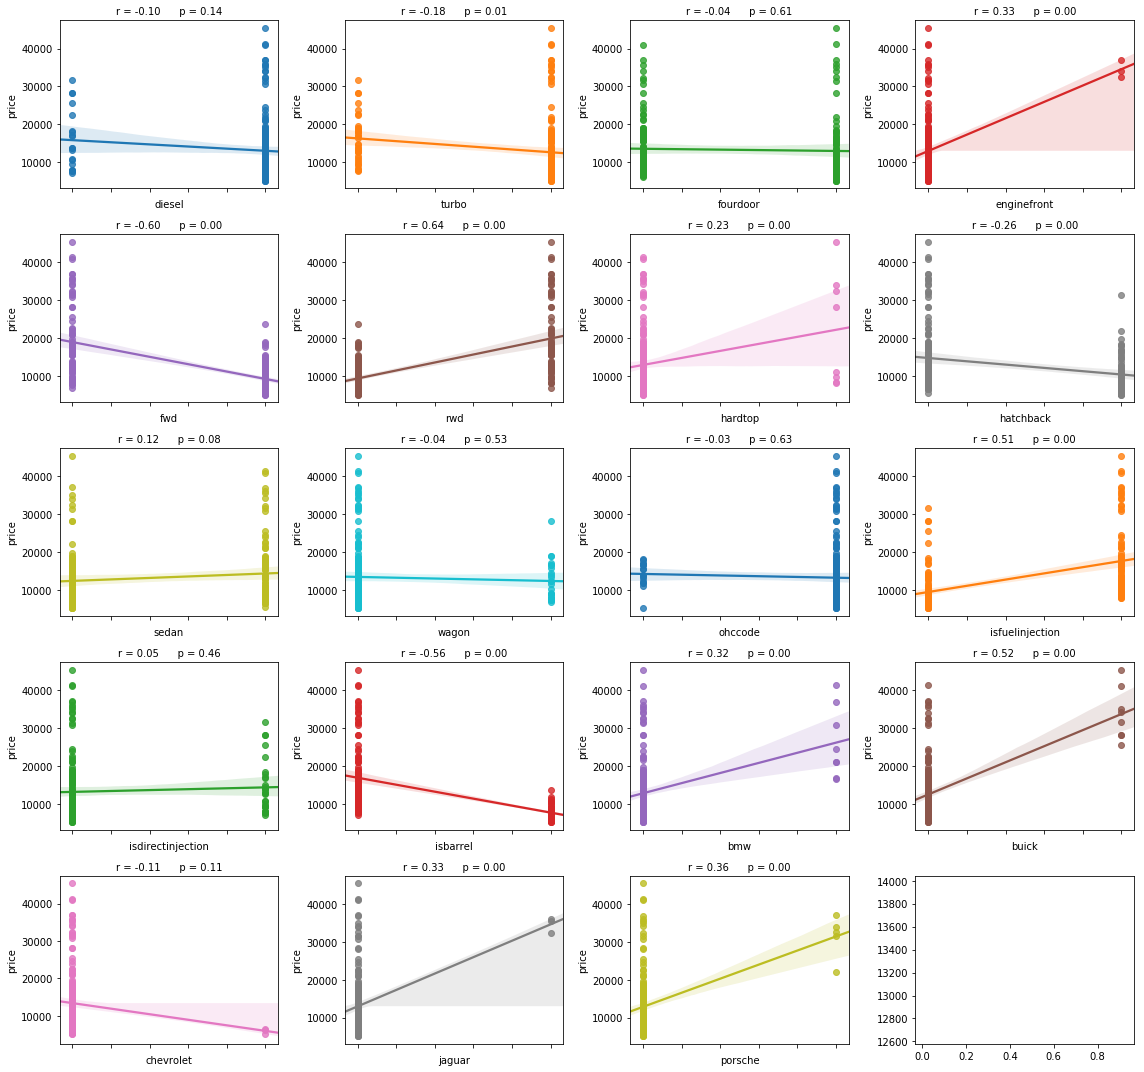

In [105]:
#Checking the pearson relation of categorical columns with Price
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

li_cat_feats = list(cat_variables)
li_not_plot = []
li_plot_cat_feats = [c for c in list(cat_variables) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_cat_feats):
            p=sns.regplot(car[li_plot_cat_feats[i]], car['price'], ax = axs[r][c])
            stp = stats.pearsonr(car[li_plot_cat_feats[i]], car['price'])            
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=10)
            p.set_xticklabels(p.get_xticklabels(),rotation=30)            
plt.tight_layout()    
plt.show()   

In [106]:
# We specify this so that the train and test data set always have the same rows, respectively
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [107]:
#scaling the data to have same scale 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Taking only numerical variables, as we won't aply it on dummy variables
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,turbo,fourdoor,enginefront,fwd,rwd,hardtop,hatchback,sedan,wagon,ohccode,isfuelinjection,isdirectinjection,isbarrel,bmw,buick,chevrolet,jaguar,porsche
165,0.6,0.272414,0.448780,0.308333,0.400000,0.301396,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,1,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0
141,0.4,0.365517,0.502439,0.425000,0.391667,0.254849,0.2,0.177358,0.746032,0.227273,0.15625,0.141667,0.265306,0.527778,0.540541,0.055474,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
183,0.8,0.368966,0.497561,0.433333,0.658333,0.279674,0.2,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.078929,1,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
190,1.0,0.272414,0.400000,0.308333,0.300000,0.284329,0.2,0.181132,0.404762,0.611111,0.09375,0.175000,0.551020,0.305556,0.324324,0.134321,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
182,0.8,0.368966,0.497561,0.433333,0.658333,0.299845,0.2,0.135849,0.261905,0.611111,1.00000,0.016667,0.265306,0.666667,0.783784,0.073404,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0


In [108]:
#View the distribution
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,turbo,fourdoor,enginefront,fwd,rwd,hardtop,hatchback,sedan,wagon,ohccode,isfuelinjection,isdirectinjection,isbarrel,bmw,buick,chevrolet,jaguar,porsche
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.570423,0.404832,0.523428,0.458803,0.487676,0.405323,0.239437,0.241695,0.502403,0.536100,0.187641,0.230634,0.410894,0.342919,0.375904,0.222985,0.915493,0.816901,0.450704,0.021127,0.619718,0.323944,0.028169,0.345070,0.464789,0.133803,0.929577,0.429577,0.140845,0.429577,0.042254,0.035211,0.021127,0.021127,0.028169
std,0.246332,0.201454,0.203516,0.180039,0.206112,0.206122,0.115444,0.156314,0.209059,0.159680,0.235471,0.170668,0.190428,0.185914,0.189146,0.225593,0.279131,0.388116,0.499325,0.144316,0.487174,0.469635,0.166041,0.477074,0.500524,0.341645,0.256763,0.496768,0.349093,0.496768,0.201879,0.184966,0.144316,0.144316,0.166041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.409756,0.308333,0.325000,0.246509,0.200000,0.135849,0.299603,0.452020,0.100000,0.091667,0.265306,0.166667,0.216216,0.071366,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,0.505691,0.425000,0.500000,0.356672,0.200000,0.184906,0.500000,0.545455,0.125000,0.195833,0.428571,0.305556,0.351351,0.137539,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.475862,0.635772,0.516667,0.641667,0.524922,0.200000,0.301887,0.706349,0.611111,0.150000,0.283333,0.551020,0.472222,0.533784,0.298595,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
#getting the train sets for dependent and independted columns
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
#View the columns
X_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'diesel', 'turbo', 'fourdoor', 'enginefront', 'fwd', 'rwd', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'ohccode', 'isfuelinjection',
       'isdirectinjection', 'isbarrel', 'bmw', 'buick', 'chevrolet', 'jaguar',
       'porsche'],
      dtype='object')

### Checking the relationship of varaibles with Price

In [ ]:
#Based on Business knowledge and the graphs implemented above, we can see that enginesize has relationship with price

In [ ]:
# Add a constant
X_train_lm = sm.add_constant(X_train['enginesize'])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Check the parameters obtained
lr.params

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.080076 + 1.253896*X_train_lm.iloc[:, 1], 'r')
plt.title("enginesize")
plt.show()

In [ ]:
# Print a summary of the linear regression model obtained
print(lr.summary())

### We have decent R-squared=0.76, P=0.0, AIC and BIC are -ve

### Lets add more columns to see if the value increase

In [ ]:

# Add a constant
X_train_lm = sm.add_constant(X_train['curbweight'])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained

lr.params


In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.147341+ 0.913656*X_train_lm.iloc[:, 1], 'r')
plt.title("curbweight")
plt.show()

In [ ]:

# Print a summary of the linear regression model obtained
print(lr.summary())

In [ ]:
#Lets add both and see if the model performs better

In [ ]:
#Creating a common function to create regression summary
def get_reg_summary(x_train_data):
    # Add a constant
    X_train_lm = sm.add_constant(x_train_data)
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()    
    # Print a summary of the linear regression model obtained
    print(lr.summary())
    return lr,X_train_lm

In [ ]:
#Adding the columns to see the regression result and see how they behave
lr,X_train_lm=get_reg_summary(X_train[['enginesize','curbweight','horsepower']])

In [ ]:
#Adding the carlength to see its impact
lr,X_train_lm=get_reg_summary(X_train[['enginesize','curbweight','horsepower','carlength']])

In [ ]:
# Carlength has too much of p value i.e. greater than >0.0.5 , hence we will check how it behaves alone
lr,X_train_lm=get_reg_summary(X_train[['carlength']])

In [ ]:
#Thus car length had high multicollinearity

In [ ]:
#Viewing the data
plt.figure(figsize=(20,25))
sns.heatmap(car.corr(), cmap="YlGnBu", annot = True)
plt.tight_layout()
plt.show()

### Finding multicollinearity

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_VIF(x_train_data):
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = x_train_data.columns
    vif['VIF'] = [variance_inflation_factor(x_train_data.values, i) for i in range(x_train_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [ ]:
get_VIF(X_train)

In [ ]:
#carlength has high multicollinearity
X_train.drop('carlength', axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train[['enginesize','curbweight','horsepower','carwidth']])

In [ ]:
get_VIF(X_train)

In [ ]:
#car width has high p value,hence dropping it
X_train.drop('carwidth', axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train[['enginesize','curbweight','horsepower','wheelbase']])

In [ ]:
#wheelbase width has high p value,hence dropping it
X_train.drop('wheelbase',axis=1,inplace=True)

In [ ]:
#Taking all the numerical columns
cols=['enginesize','curbweight','horsepower','boreratio','stroke', 'compressionratio','peakrpm', 'citympg','cylindernumber','symboling','highwaympg']


In [ ]:
lr,X_train_lm=get_reg_summary(X_train[cols])        

In [ ]:
#symboling width has high p value,hence dropping it
X_train.drop('symboling',axis=1,inplace=True)


In [ ]:
cols.remove('symboling')

In [ ]:
lr,X_train_lm=get_reg_summary(X_train[cols])        

In [ ]:
#highwaympg width has high p value,hence dropping it
X_train.drop('highwaympg',axis=1,inplace=True)
cols.remove('highwaympg')

In [ ]:
lr,X_train_lm=get_reg_summary(X_train[cols])

In [ ]:
#citympg width has high p value,hence dropping it
X_train.drop('citympg',axis=1,inplace=True)
cols.remove('citympg')

In [ ]:
get_VIF(X_train)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train[cols])

In [ ]:
#peakrpm width has high p value,hence dropping it
X_train.drop('peakrpm',axis=1,inplace=True)
cols.remove('peakrpm')

In [ ]:
lr,X_train_lm=get_reg_summary(X_train[cols])

In [ ]:
get_VIF(X_train)

### As we have too many columns we will use RFE 

In [ ]:
 # Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X_train_cat=X_train[cat_variables]



In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)



In [ ]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)



In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


In [ ]:
#Important columns
col = X_train.columns[rfe.support_]
col



In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
# Colums which are not required
col_to_drop=X_train.columns[~rfe.support_]

In [ ]:
#dropping the columns
X_train.drop(col_to_drop,axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
get_VIF(X_train)

In [ ]:
#hardtop width has high p value,hence dropping it
X_train.drop('hardtop',axis=1,inplace=True)


In [ ]:
col=list(col)
col.remove('hardtop')


In [ ]:
lr,X_train_lm=get_reg_summary(X_train)   

In [ ]:
#Checking the correlation for multcolinearity
plt.figure(figsize=(9,4))
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Comparing models 

### Lets compare the modles based on different variables

#### We will compare enginesize ,curbweight,cylindernumber as they have high correaltion among them

#### Enginesize

In [ ]:
X_train_new=X_train.drop('enginesize',axis=1)


In [ ]:
lr,X_train_lm=get_reg_summary(X_train_new)

In [ ]:
X_train.columns

In [ ]:
get_VIF(X_train_new)

### curbweight

In [ ]:
X_train_new=X_train.drop('curbweight',axis=1)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train_new)

In [ ]:
get_VIF(X_train_new)

### cylindernumber

In [ ]:
X_train_new=X_train.drop('cylindernumber',axis=1)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train_new)

In [ ]:
get_VIF(X_train_new)

#### As removing enginesize will give the best model and also it has high p-value will drop enginesize

In [ ]:
X_train.drop('enginesize',axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
#stroke width has high p value,hence dropping it
X_train.drop('stroke',axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
#cylindernumber width has high p value,hence dropping it
X_train.drop('cylindernumber', axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
get_VIF(X_train)

In [ ]:
#porsche width has high p value,hence dropping it
X_train.drop('porsche', axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
get_VIF(X_train)

In [ ]:
#boreratio width has high p value,hence dropping it
X_train.drop('boreratio', axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
get_VIF(X_train)

### Comparisng models

#### As now we have all the variable with low p value, but still we have column which have high multicollinarity
#### We need to remove those column to have better model

In [ ]:
#Correlation graph
plt.figure(figsize=(9,4))
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Comparing models for below-
#### 1.curbweight
#### 2.horsepower

### curbweight

In [ ]:
X_train_new=X_train.drop('curbweight',axis=1)


In [ ]:
lr,X_train_lm=get_reg_summary(X_train_new)

In [ ]:
X_train.columns

In [ ]:
get_VIF(X_train_new)

### horsepower

In [ ]:
X_train_new=X_train.drop('horsepower',axis=1)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train_new)

In [ ]:
get_VIF(X_train_new)

#### Dropping horsepower will result in better model hence droppng horsepower varaibel

In [ ]:
X_train.drop('horsepower', axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
get_VIF(X_train)

In [ ]:
#compressionratio width has high p value,hence dropping it
X_train.drop('compressionratio',axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
get_VIF(X_train)

In [ ]:
#isdirectinjection width has high p value,hence dropping it

X_train.drop('isdirectinjection',axis=1,inplace=True)

In [ ]:
lr,X_train_lm=get_reg_summary(X_train)

In [ ]:
get_VIF(X_train)

#### Now we have model where we have all the variables which have low p value i.e.<0.05  , good t value
#### and we don't have any varaible which is dependent i.e. have multicollinearity 

## Prediction

In [ ]:
#prediction
y_train_price = lr.predict(X_train_lm)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Error seems fine as it has normal distribution and has is centered at zero

In [ ]:
#Train data columns
X_train_lm.columns

In [ ]:
#Applying scaler transformation on test data
df_test[num_variables] = scaler.transform(df_test[num_variables])

### Dividing into X and Y sets for the test model 

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
X_train.columns

In [ ]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lr.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## The model seems to perform good

### Let's see other factors

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
#Mean_Squared_Error and r_square_value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

### Mean_Squared_Error and r_square_value

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

### Actual vs Predicted

In [ ]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.ylabel('Price', fontsize=16)                               # Y-label

In [ ]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.ylabel('Price', fontsize=16)                # Y-label

In [ ]:
## Error tends to follow a pattern as expected for Multi-Linear Regression

## Conclusion

#### We can see that the equation of our best fitted line is:

  0.7380Xcurbweight+0.5438Xenginefront-0.0873Xwagon+0.2759Xbmw+0.1981Xbuick+ 0.1860Xjaguar-0.0985

1. curbweight- as higher then weight , higher the cost of material ,hence overall increase in price
2. enginefront- Front engine car are costlier 
3. carbody-wagon- if the car is a wagon , it mean it will be cheaper than other type like sedan etc.
4. car brands also impact the car price, as some premium car brand have higher price tags
    We can see that if the car brands are bmw,buick and jaguar,they tend to have a higher cost,
    hence if the car has bmw,buick or jaguar, it will increase the cost of the car

### Geely Auto should consider below variables and their relationship with price

1. curbweight-direct relationship:0.7380 
2. enginefront-direct relationship:0.5438
3. carbody-wagon-inverse relationship: -0.0873
4. car brands-
    bmw:0.2759
    buick :0.1981
    jaguar:0.1860